In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the csv file as dataframe df
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#Removing the Serial No. column as we have an index
df = df.drop(['Serial No.'], axis=1)

### Descriptive Statistics

In [9]:
df.shape

(500, 8)

In [7]:
#Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [15]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


- By describe we can tell the max and min values of the columns and also if there are any outliers in the dataset
- we can clealry see by plotting the box plots in the future

#### Data Cleaning
- Check for any null values and duplicated values in the data

In [10]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
df.duplicated().sum()

0

- From the Above cells we can tell There are no null and duplicated values in the dataset

#### Visualizations

- Pie chart for University Rating and
- bar chart for students who had done reasearch and who doesn't

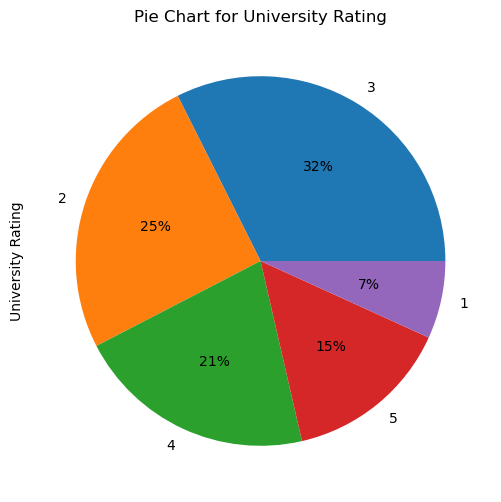

In [143]:
df['University Rating'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(8,6),
                                            title="Pie Chart for University Rating")
plt.show()

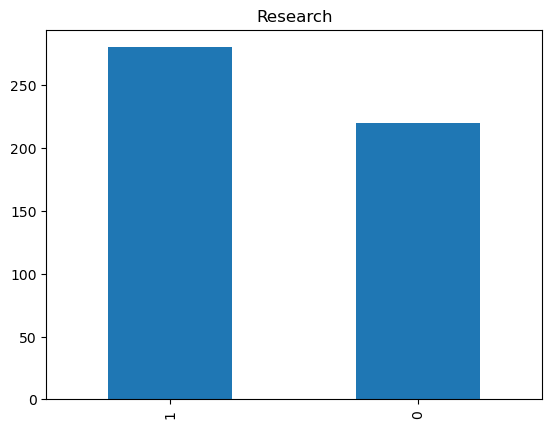

In [144]:
df['Research'].value_counts().plot(kind='bar',title="Research")
plt.show()

- Box plots for all the cloumns
- This plot will help us to identify outliers present in the data and also max val,min val,median,q1and q3

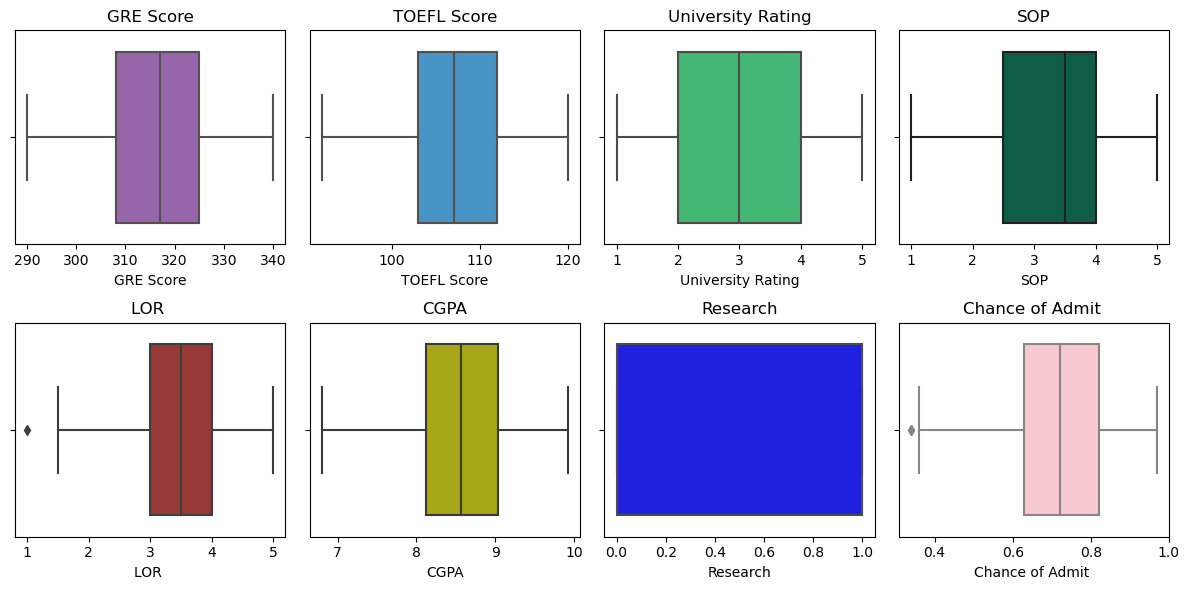

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
# fig.subplots_adjust(hspace=0.5)

my_colors = ["#9b59b6", "#3498db", "#2ecc71", "#006a4e",'brown','y','b','pink']

# Iterate over each column
for i, column in enumerate(df.columns):
    # Calculate row and column indices for subplots
    row = i // 4
    col = i % 4

    # Create box plot for the current column
    sns.boxplot(x=df[column], ax=axes[row, col],color=my_colors[i])
    axes[row, col].set_title(column)
    

# Show the plot
plt.tight_layout()
plt.show()

- From the above plots we can see there are not much outliers so no need to worry about outliers

- Kde Plots for all the columns
- to see the distribution of observations in the data_clean.csv

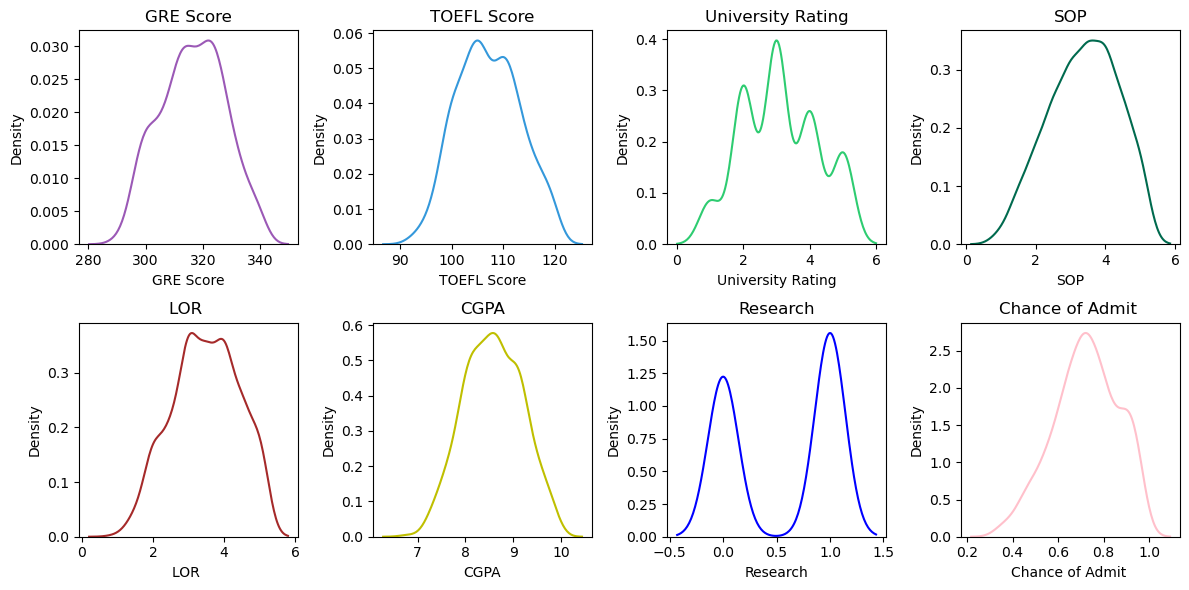

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
# fig.subplots_adjust(hspace=0.5)

my_colors = ["#9b59b6", "#3498db", "#2ecc71", "#006a4e",'brown','y','b','pink']

# Iterate over each column
for i, column in enumerate(df.columns):
    # Calculate row and column indices for subplots
    row = i // 4
    col = i % 4

    # Create box plot for the current column
    sns.kdeplot(x=df[column], ax=axes[row, col],color=my_colors[i])
    axes[row, col].set_title(column)
    

# Show the plot
plt.tight_layout()
plt.show()

- We can clearly see Reasearch column has a binomial Distribution
- As we can observe there are some columns which are normally distributed like CGPA,GRE,SOP not perfectly normal but near to normally distributed

- pairplot for the dataframe
- gives the relationship between the variables

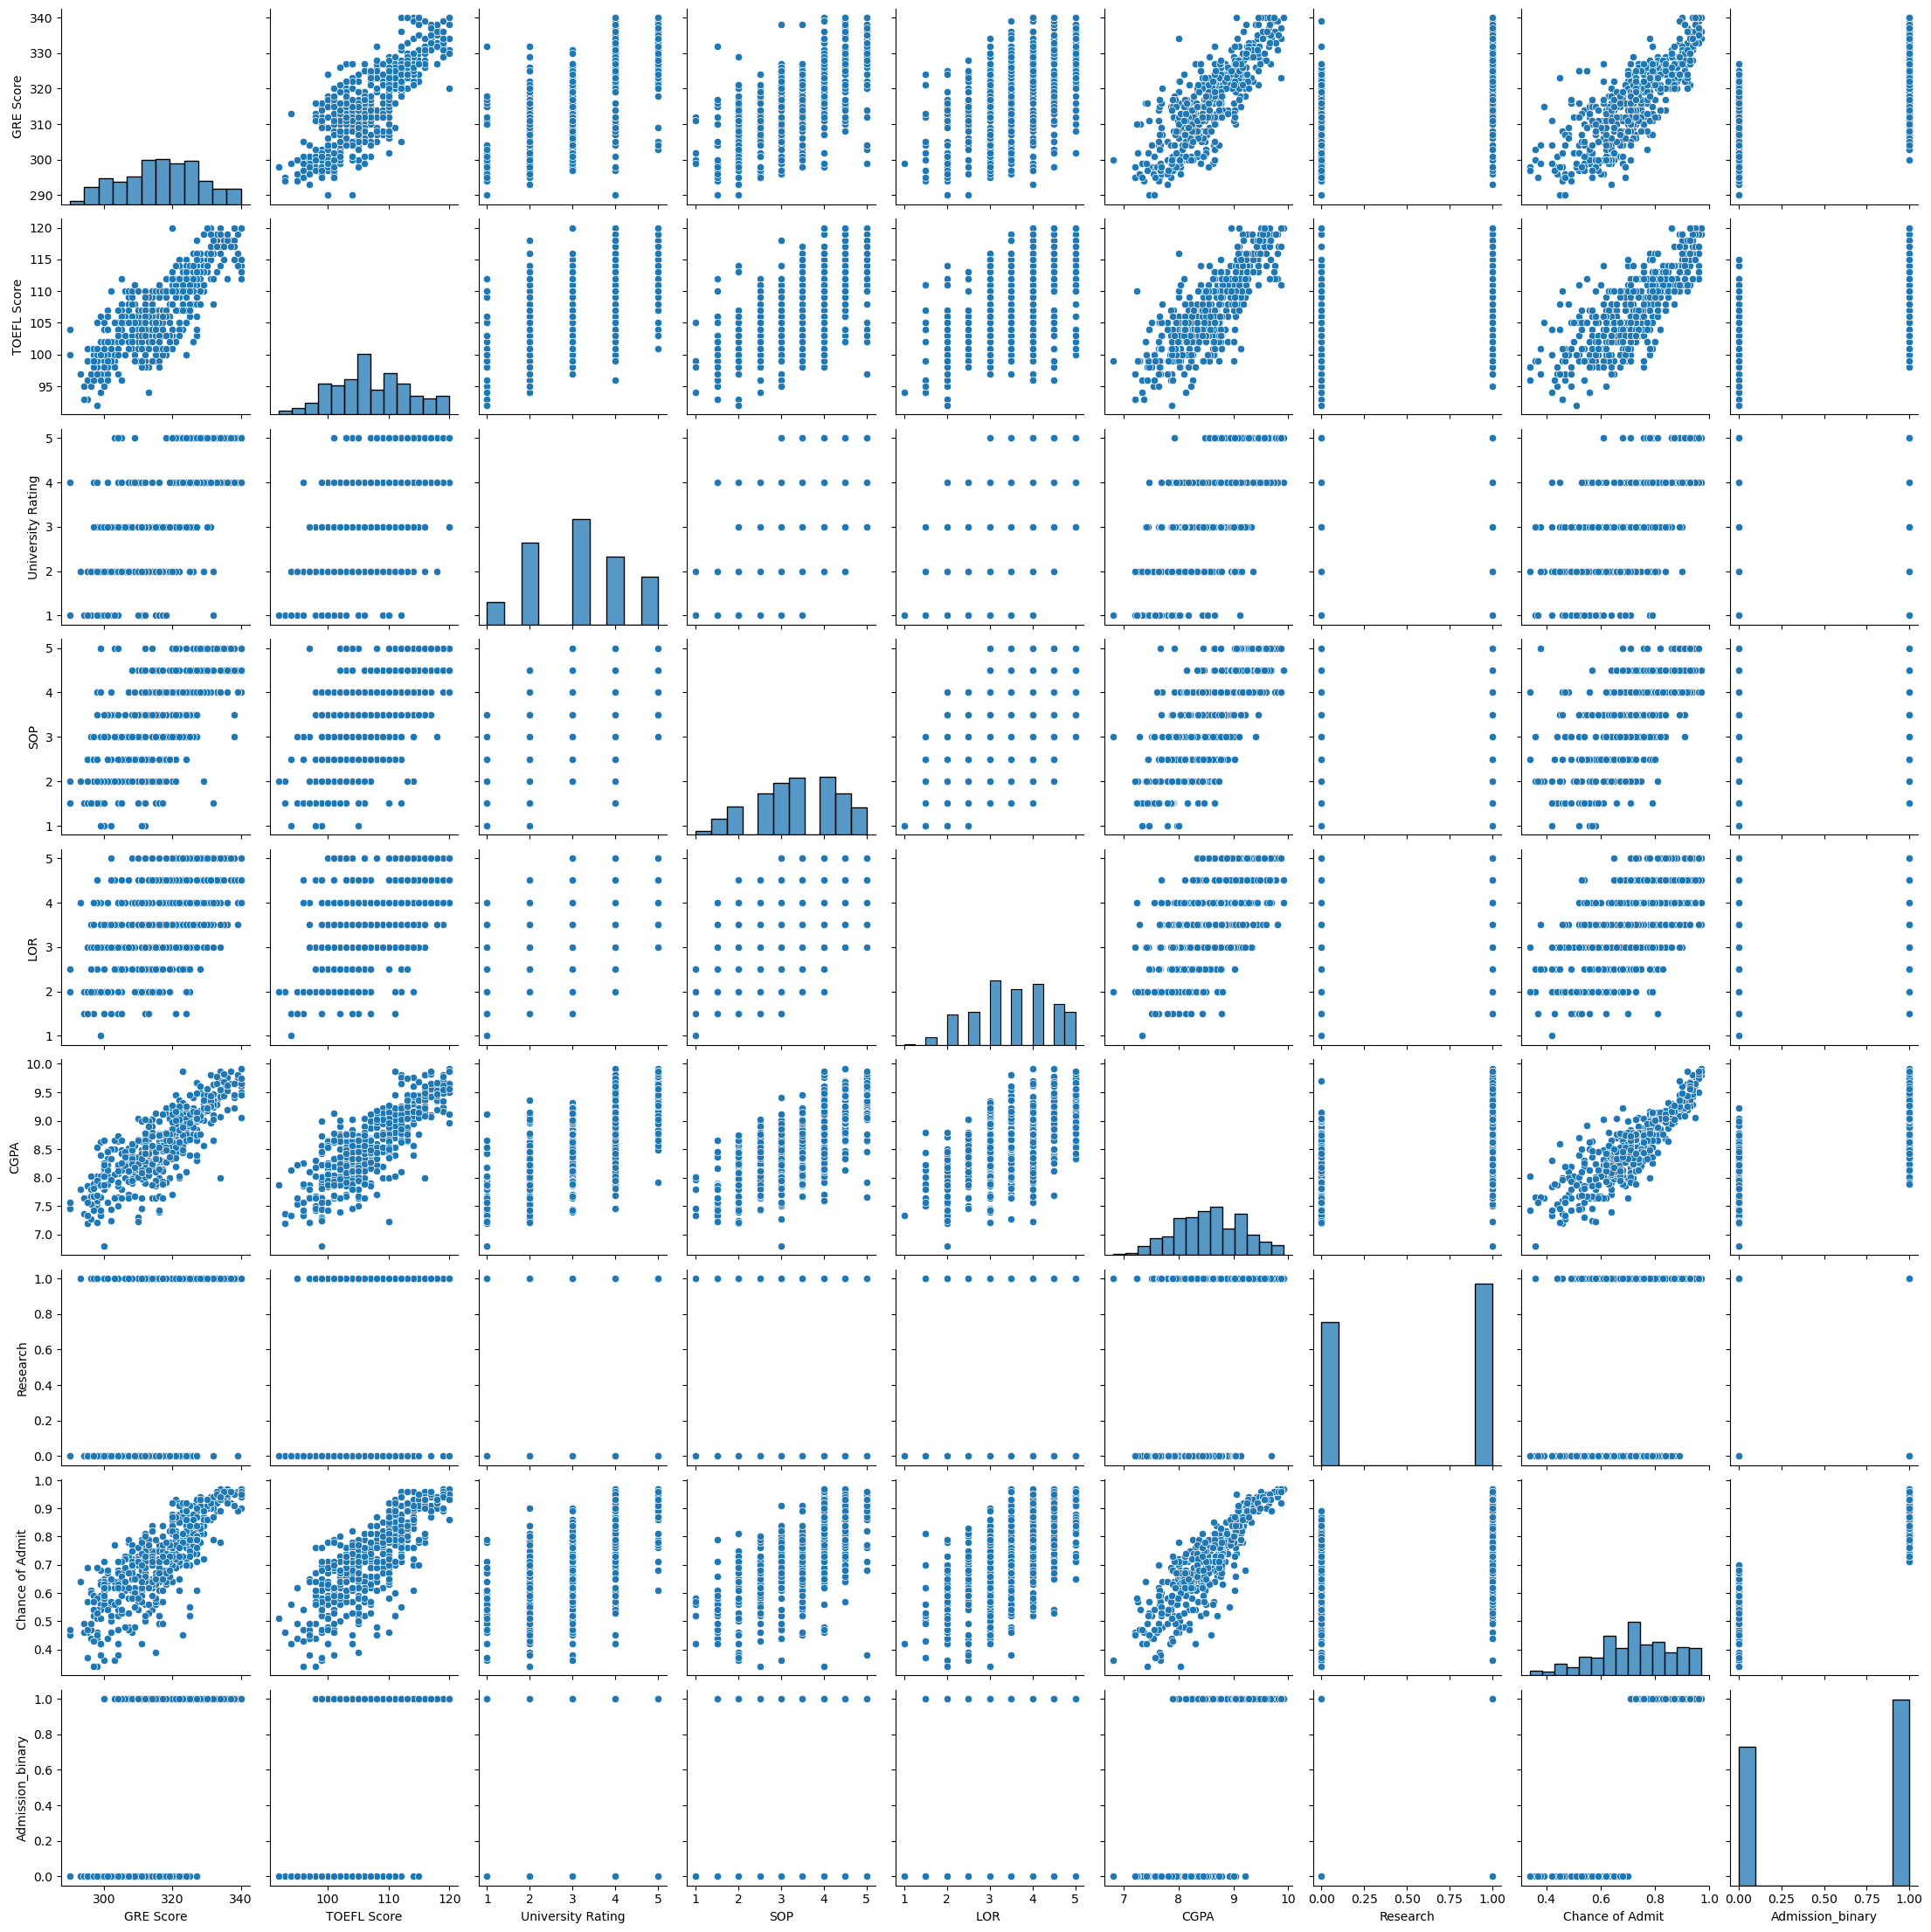

In [147]:
sns.pairplot(df, palette='Blues')

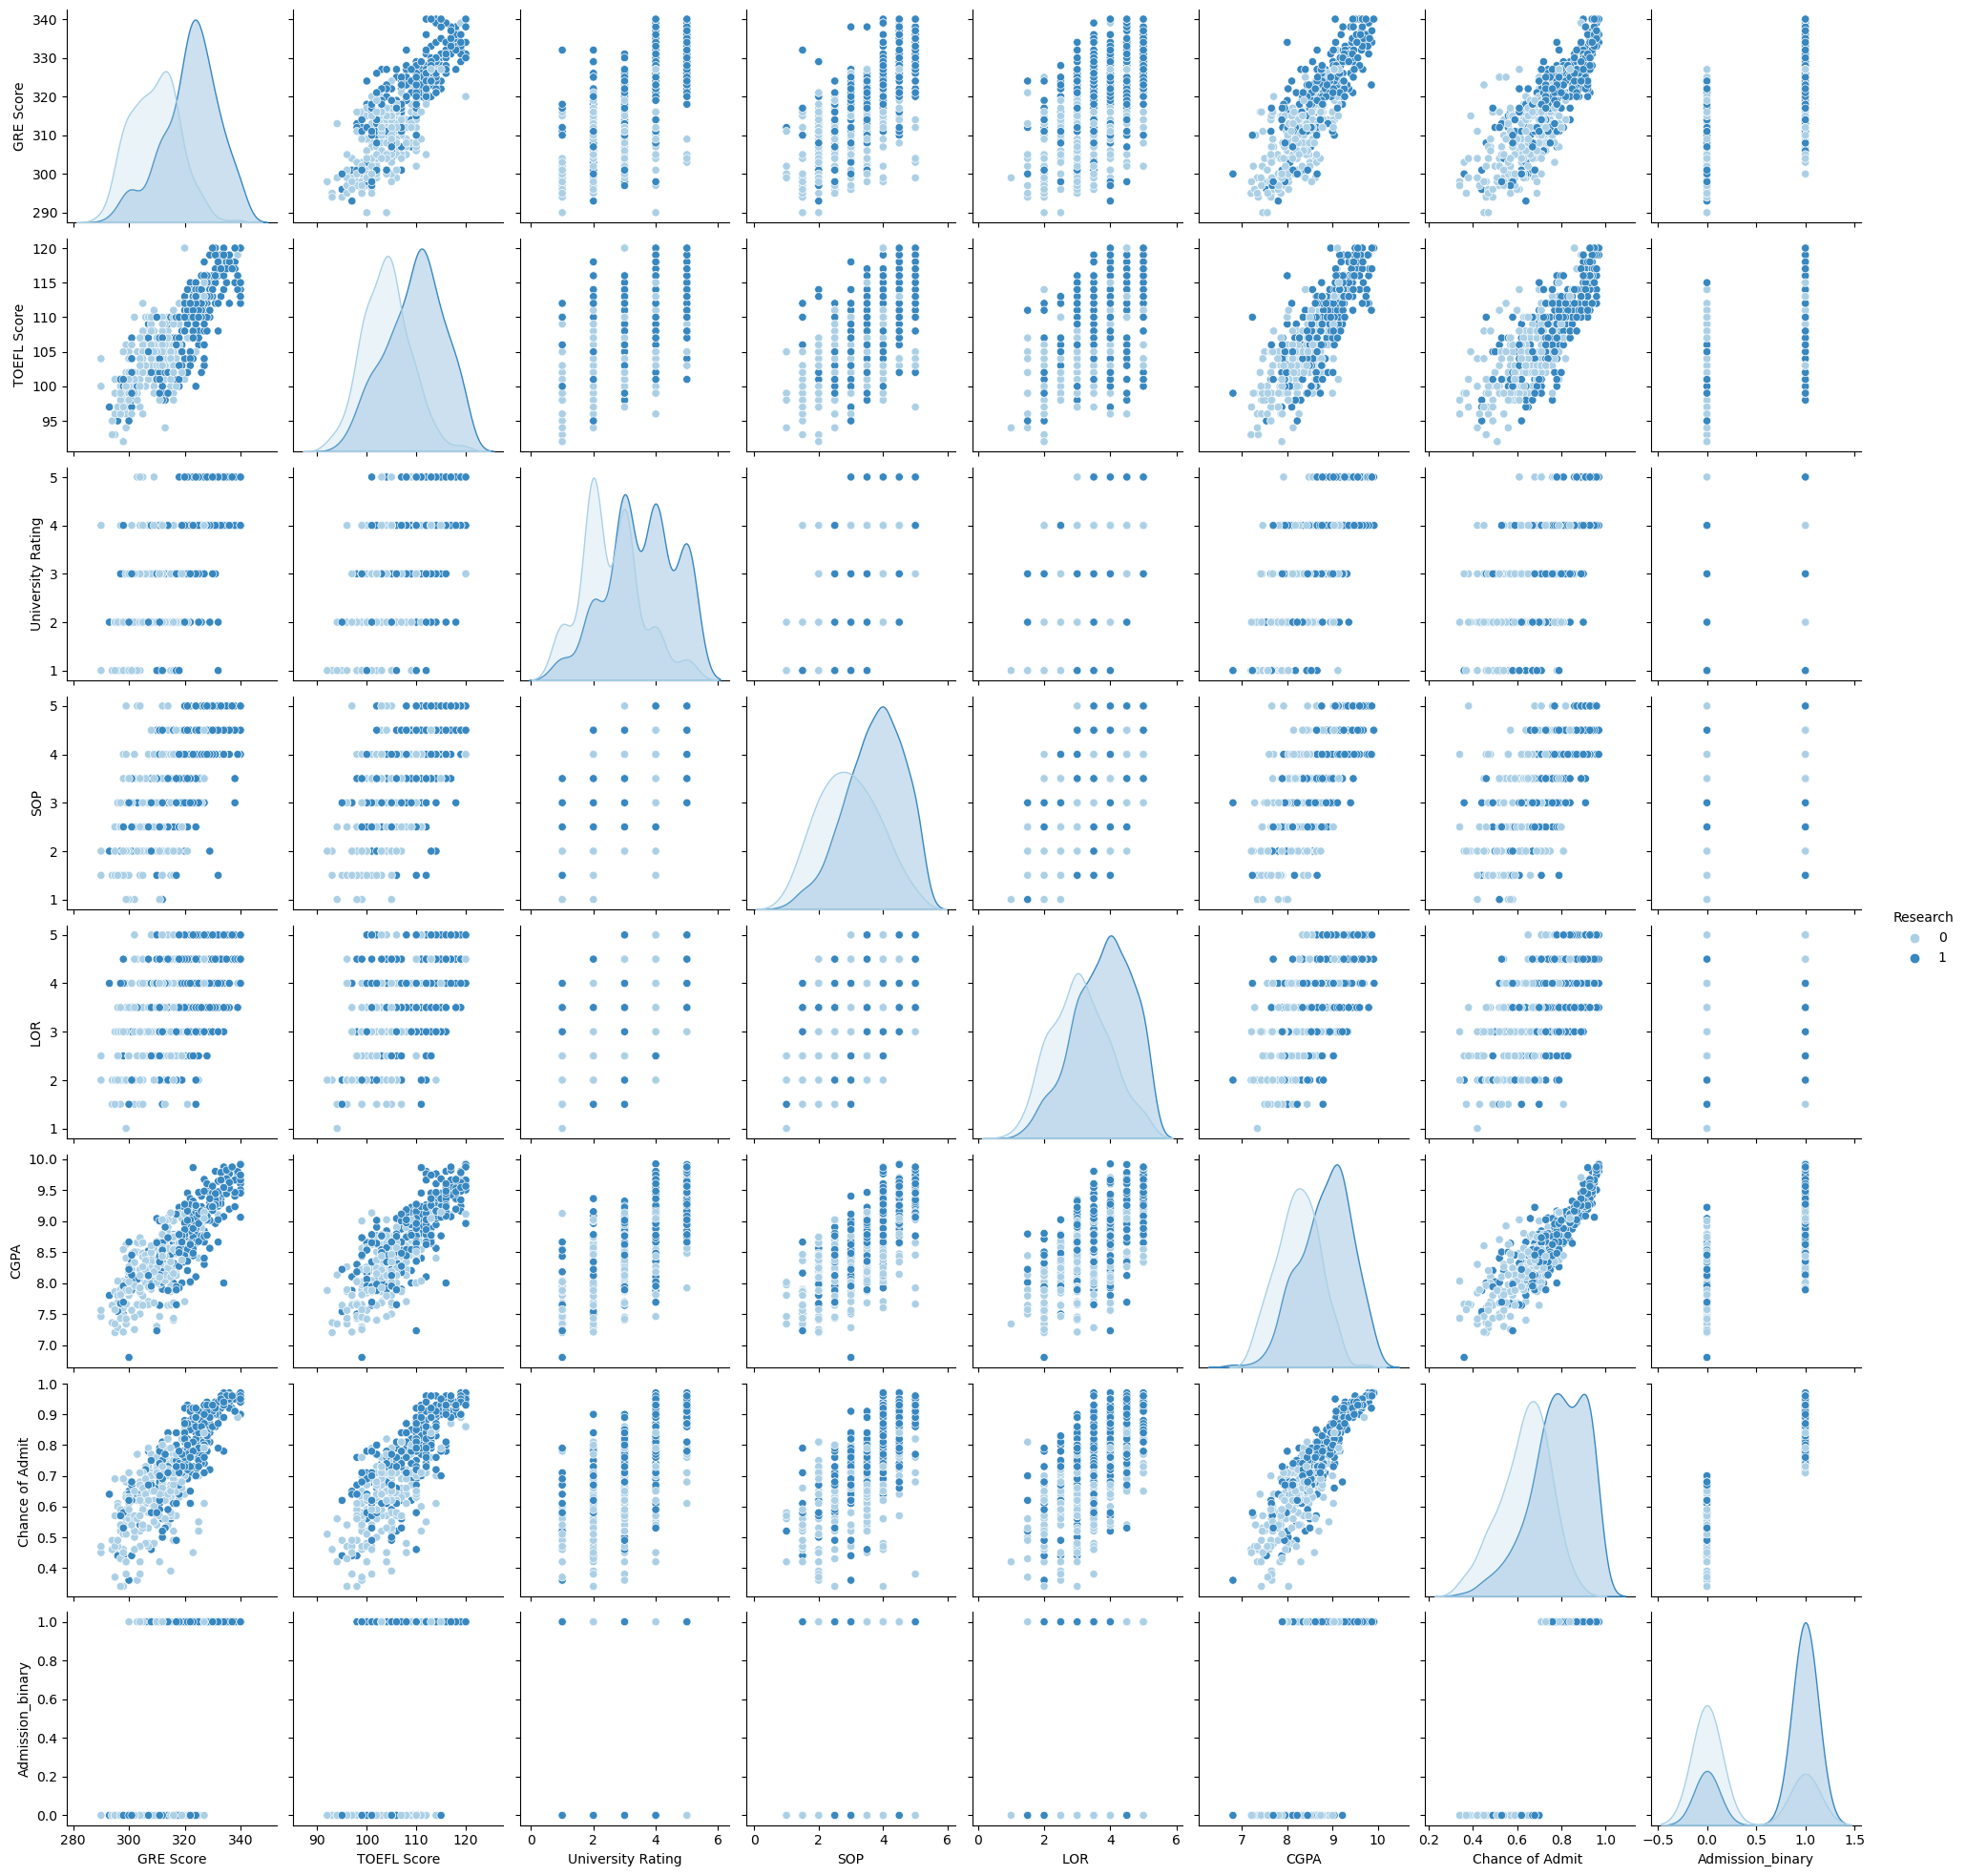

In [146]:
sns.pairplot(df, hue='Research', palette='Blues')

- corr will gives how much is one variable related to another

In [41]:
corr = df.corr()
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

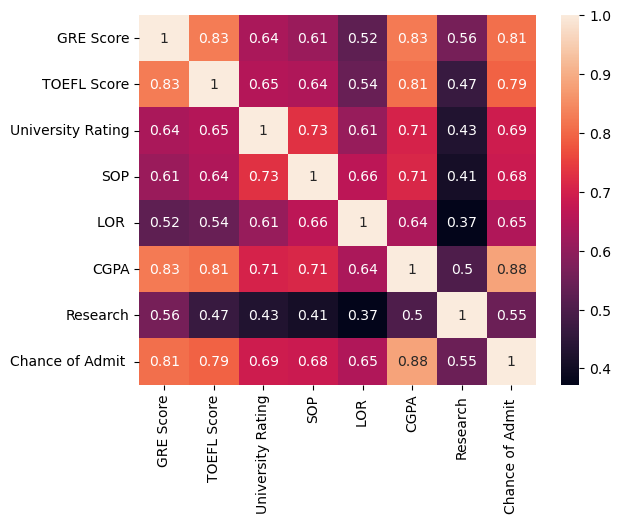

In [43]:
sns.heatmap(corr,annot=True)

- we can see that cgpa , Gre , Tofel are higlhy correlated with the chance of admit
- and also we can observe there is multi-collinearity between cgpa,Gre,Tofel

#### Checking VIF Score to know if there is multi-collinearity or not

In [45]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for gender

  
# the independent variables set
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

             feature          VIF
0          GRE Score  1308.061089
1        TOEFL Score  1215.951898
2  University Rating    20.933361
3                SOP    35.265006
4               LOR     30.911476
5               CGPA   950.817985
6           Research     2.869493


- Lets try by removong Gre Score and Tofel score

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# creating dummies for gender

  
# the independent variables set
X = df[['GRE Score','Research']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

     feature       VIF
0  GRE Score  2.377465
1   Research  2.377465


### Model Building with these columns

#### Logistic Regression

In [77]:
df["Admission_binary"] = np.where(df['Chance of Admit '] > 0.5, 1, 0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission_binary
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,1


In [78]:
df['Admission_binary'].value_counts()

1    461
0     39
Name: Admission_binary, dtype: int64

- If we have used the thershold as 0.5 then it will lead to imbalance in the dataset to overcome this issue i am using thershold as 0.7

In [82]:
df["Admission_binary"] = np.where(df['Chance of Admit '] > 0.7, 1, 0)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission_binary
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


In [83]:
df['Admission_binary'].value_counts()

1    287
0    213
Name: Admission_binary, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

#Splitting the data 
X= df[['GRE Score','Research']]
y= df["Admission_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [137]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,recall_score,precision_score

In [93]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [94]:
logit_pred = logit.predict(X_test)

In [99]:
log_accuracy = accuracy_score(y_test, logit_pred)
log_f1_score = f1_score(y_test, logit_pred)
log_recall_score = recall_score(y_test, logit_pred)
log_roc_auc_score = roc_auc_score(y_test, logit_pred)

In [100]:
print("Logistic Regression Accuracy:", log_accuracy)
print("Logistic Regression F1_Score:", log_f1_score)
print("Logistic Regression Recall_score:", log_recall_score)
print("Logistic Regression roc_auc_score:", log_roc_auc_score)

Logistic Regression Accuracy: 0.85
Logistic Regression F1_Score: 0.8571428571428571
Logistic Regression Recall_score: 0.8823529411764706
Logistic Regression roc_auc_score: 0.8493397358943577


### SVM

In [106]:
from sklearn.svm import SVC

svm_model = SVC()

svm_model.fit(X_train, y_train)

SVC()

In [107]:
svm_model_pred = svm_model.predict(X_test)

In [108]:
svm_model_accuracy = accuracy_score(y_test, svm_model_pred)
svm_model_f1_score = f1_score(y_test, svm_model_pred)
svm_model_recall_score = recall_score(y_test, svm_model_pred)
svm_model_roc_auc_score = roc_auc_score(y_test, svm_model_pred)

In [109]:
print("SVM Accuracy:", svm_model_accuracy)
print("SVM F1_Score:", svm_model_f1_score)
print("SVM Recall_score:",svm_model_recall_score )
print("SVM roc_auc_score:", svm_model_roc_auc_score)

SVM Accuracy: 0.81
SVM F1_Score: 0.8347826086956521
SVM Recall_score: 0.9411764705882353
SVM roc_auc_score: 0.8073229291716687


### Decision Tree

- for some models like Decison tree and random forest multi-collinearity does not have any affect so no need to remove the columns with high vif

In [129]:
#Splitting the data 
X1= df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research']]
y1= df["Admission_binary"]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size=0.20, random_state=42)

In [130]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [131]:
dt_model_pred = dt_model.predict(X1_test)

In [132]:
dt_model_accuracy = accuracy_score(y1_test, dt_model_pred)
dt_model_f1_score = f1_score(y1_test, dt_model_pred)
dt_model_recall_score = recall_score(y1_test, dt_model_pred)
dt_model_roc_auc_score = roc_auc_score(y1_test, dt_model_pred)

In [133]:
print("Decision Tree Accuracy:", dt_model_accuracy)
print("Decision Tree F1_Score:", dt_model_f1_score)
print("Decision Tree Recall_score:", dt_model_recall_score)
print("Decision Tree roc_auc_score:", dt_model_roc_auc_score)

Decision Tree Accuracy: 0.79
Decision Tree F1_Score: 0.7999999999999999
Decision Tree Recall_score: 0.8235294117647058
Decision Tree roc_auc_score: 0.7893157262905162


### Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X1_train, y1_train)

RandomForestClassifier()

In [134]:
rf_model_pred = rf_model.predict(X1_test)

In [135]:
rf_model_accuracy = accuracy_score(y1_test, rf_model_pred)
rf_model_f1_score = f1_score(y1_test, rf_model_pred)
rf_model_recall_score = recall_score(y1_test, rf_model_pred)
rf_model_roc_auc_score = roc_auc_score(y1_test, rf_model_pred)

In [136]:
print("Random Forest Accuracy:", rf_model_accuracy)
print("Random Forest F1_Score:", rf_model_f1_score)
print("Random Forest Recall_score:", rf_model_recall_score)
print("Random Forest roc_auc_score:", rf_model_roc_auc_score)

Random Forest Accuracy: 0.85
Random Forest F1_Score: 0.8514851485148515
Random Forest Recall_score: 0.8431372549019608
Random Forest roc_auc_score: 0.850140056022409


### Actual vs Predictions

In [138]:
pred_df = pd.DataFrame()
pred_df['actual'] = y_test

In [141]:
pred_df['logistic'] = logit_pred
pred_df['SVM'] = svm_model_pred
pred_df['Decsion_Tree'] = dt_model_pred
pred_df['Random_Forest'] = rf_model_pred

In [142]:
pred_df

,actual,logistic,SVM,Decsion_Tree,Random_Forest
361,1,1,1,1,1
73,1,1,1,1,1
374,0,0,1,0,0
155,1,0,1,0,0
104,1,1,1,1,1
...,...,...,...,...,...
347,0,0,0,0,0
86,1,0,1,1,1
75,1,1,1,1,1
438,0,1,1,1,1
